You are given a positive integer n representing n cities numbered from 1 to n. You are also given a 2D array roads where roads[i] = [ai, bi, distancei] indicates that there is a bidirectional road between cities ai and bi with a distance equal to distancei. The cities graph is not necessarily connected.

The score of a path between two cities is defined as the minimum distance of a road in this path.

Return the minimum possible score of a path between cities 1 and n.

Note:

A path is a sequence of roads between two cities.
It is allowed for a path to contain the same road multiple times, and you can visit cities 1 and n multiple times along the path.
The test cases are generated such that there is at least one path between 1 and n.
 

Example 1:

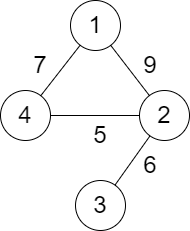

Input: n = 4, roads = [[1,2,9],[2,3,6],[2,4,5],[1,4,7]]
Output: 5
Explanation: The path from city 1 to 4 with the minimum score is: 1 -> 2 -> 4. The score of this path is min(9,5) = 5.
It can be shown that no other path has less score.


Example 2:

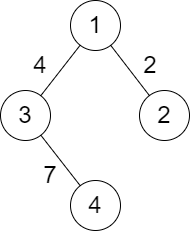

Input: n = 4, roads = [[1,2,2],[1,3,4],[3,4,7]]
Output: 2
Explanation: The path from city 1 to 4 with the minimum score is: 1 -> 2 -> 1 -> 3 -> 4. The score of this path is min(2,2,4,7) = 2.
 

Constraints:

2 <= n <= 105
1 <= roads.length <= 105
roads[i].length == 3
1 <= ai, bi <= n
ai != bi
1 <= distancei <= 104
There are no repeated edges.
There is at least one path between 1 and n.

In [ ]:
class Solution:
    def minScore(self, n: int, roads: List[List[int]]) -> int:
        graph = defaultdict(list)
        mindist = 10**6
        maxdist = 0
        for i, j, dist in roads:
            maxdist = max(maxdist, dist)
            mindist = min(mindist, dist)
            graph[i].append([j, dist])
            graph[j].append([i, dist])

        score = maxdist
        visited = set()
        q = deque([[1, maxdist]])
        while q:
            node, dist = q.popleft()
            visited.add(node)
            score = min(score, dist)
            if score == mindist:
                return score
            for nxt, nxtdist in graph[node]:
                if nxt not in visited:
                    q.append([nxt, nxtdist])

        return score